In [70]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **krfont)
plt.style.use('ggplot')
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

### merge된 데이터 불러오기 (안준이형)

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/gj4241/iron-ore-price-prediction/master/data/ironOre_vs_allIndex.csv',
                encoding='euc-kr',parse_dates=['date'])

In [3]:
df.isnull().sum()

## 데이터의 10개 를 기준으로 그이상의 missing values 가 있음 

date                                                                   0
철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton                             26
Bloomberg(DJ-UBS) Commodity Index1991=100                             26
Bloomberg Commodity Total Return1991=100                              26
TR/CC CRB Index1967=100                                               26
S&P GSCI1970=100                                                      26
GSCI Energy1970=100                                                   26
GSCI Petroleum1970=100                                                26
GSCI Non-Energy1970=100                                               26
GSCI Reduced Energy Index (CPW 2)1970=100                             26
GSCI Light Energy Index (CPW 4)1970=100                               26
GSCI Industrial Metals1970=100                                        26
GSCI Precious Metals1970=100                                          26
GSCI Agriculture1970=100                           

In [4]:
df.describe()

,철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton,Bloomberg(DJ-UBS) Commodity Index1991=100,Bloomberg Commodity Total Return1991=100,TR/CC CRB Index1967=100,S&P GSCI1970=100,GSCI Energy1970=100,GSCI Petroleum1970=100,GSCI Non-Energy1970=100,GSCI Reduced Energy Index (CPW 2)1970=100,GSCI Light Energy Index (CPW 4)1970=100,...,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000,철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.3,USD/KRW (미국 달러 / 한국 원),CNY/KRW (중국 인민폐 / 한국 원),USD/CNY (미국 달러 / 중국 인민폐)
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1316.000000,1262.000000,1310.000000,1310.000000,1310.000000,1310.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,76.790852,99.312645,200.667478,220.122376,455.324874,218.585631,237.377692,342.767308,426.809377,397.115300,...,837.678116,1005.463700,851.692366,851.957252,917.697710,850.800000,76.875726,1111.164511,173.092810,6.417251
std,26.592685,19.244257,38.304895,46.383277,113.434137,73.279041,81.341678,30.313434,88.361234,65.869667,...,197.547978,165.985023,71.460669,75.977971,68.786049,43.697285,26.629674,49.406721,6.501151,0.264105
min,38.300000,72.880000,146.880000,155.010200,271.806000,98.900000,104.640000,293.490000,284.320000,291.260000,...,400.430000,771.010000,759.000000,747.000000,818.000000,782.000000,38.300000,1008.900000,162.010000,6.043698
25%,57.805000,84.905000,171.975000,184.567500,371.152500,163.970000,176.655000,318.640000,360.457500,347.145000,...,705.190000,867.490000,780.000000,780.750000,844.000000,806.000000,57.890000,1071.900000,167.580000,6.202169
50%,67.725000,88.710000,180.270000,196.006800,411.155000,187.660000,202.325000,335.880000,393.920000,375.095000,...,824.180000,969.660000,851.000000,832.000000,930.000000,861.000000,67.810000,1113.000000,172.840000,6.357775
75%,87.447500,118.717500,239.095000,273.492500,567.847500,292.680000,320.587500,369.357500,511.780000,456.160000,...,1012.000000,1140.270000,923.000000,929.000000,991.000000,895.000000,87.605000,1145.650000,177.900000,6.631448
max,144.180000,138.670000,279.240000,312.930000,668.860000,358.880000,395.620000,419.790000,594.270000,529.950000,...,1195.360000,1597.830000,960.000000,981.000000,1003.000000,906.000000,144.180000,1240.900000,189.530000,6.960600


In [5]:
df.head()

# PDS 원자재 지수2015.01.02=100	PDS 귀금속 하위지수2015.01.02=100	철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton	PDS 에너지 하위지수2015.01.02=100	PDS 비철금속 하위지수2015.01.02=100	PDS 철강 하위지수2015.01.02=100	PDS 석유화학 하위지수2015.01.02=100	PDS 농산물 하위지수2015.01.02=100
# 등 일부 데이터의 NA 가 있어보임 ->>>> drop 할것인지 이것또한 lag 할것인지 추후결정 일단 EDA를 위해 keep

,date,철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton,Bloomberg(DJ-UBS) Commodity Index1991=100,Bloomberg Commodity Total Return1991=100,TR/CC CRB Index1967=100,S&P GSCI1970=100,GSCI Energy1970=100,GSCI Petroleum1970=100,GSCI Non-Energy1970=100,GSCI Reduced Energy Index (CPW 2)1970=100,...,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000,철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.3,USD/KRW (미국 달러 / 한국 원),CNY/KRW (중국 인민폐 / 한국 원),USD/CNY (미국 달러 / 중국 인민폐)
0,2013-07-05,124.45,125.54,252.70,280.72,634.02,337.35,370.95,377.28,562.61,...,1118.0,NaN,NaN,NaN,NaN,NaN,124.45,1140.2,186.13,6.132150
1,2013-07-08,120.21,126.93,255.49,282.64,634.83,337.03,370.13,380.04,564.04,...,1118.0,NaN,NaN,NaN,NaN,NaN,120.21,1141.7,186.17,6.132629
2,2013-07-09,123.90,127.27,256.19,283.60,637.17,337.75,371.26,383.04,566.63,...,1118.0,NaN,NaN,NaN,NaN,NaN,123.90,1151.4,187.71,6.131702
3,2013-07-10,124.51,128.30,258.26,286.17,644.31,342.38,376.44,384.77,572.17,...,1118.0,NaN,NaN,NaN,NaN,NaN,124.51,1144.7,186.75,6.136973
4,2013-07-11,126.43,128.60,258.88,286.68,641.56,339.46,373.37,387.57,571.13,...,1118.0,NaN,NaN,NaN,NaN,NaN,126.43,1138.8,185.65,6.137603


In [15]:
df.columns=['date', 'target',
       'Bloomberg(DJ-UBS) Commodity Index1991=100',
       'Bloomberg Commodity Total Return1991=100', 'TR/CC CRB Index1967=100',
       'S&P GSCI1970=100', 'GSCI Energy1970=100', 'GSCI Petroleum1970=100',
       'GSCI Non-Energy1970=100', 'GSCI Reduced Energy Index (CPW 2)1970=100',
       'GSCI Light Energy Index (CPW 4)1970=100',
       'GSCI Industrial Metals1970=100', 'GSCI Precious Metals1970=100',
       'GSCI Agriculture1970=100', 'GSCI Livestock1970=100',
       'GSCI Softs1970=100', 'Reuters Index of Commodity Prices1931.09.18=100',
       'CRB BLS Spot Index1967=100', 'PDS 원자재 지수2015.01.02=100',
       'PDS 귀금속 하위지수2015.01.02=100',
       '철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.1',
       'PDS 에너지 하위지수2015.01.02=100', 'PDS 비철금속 하위지수2015.01.02=100',
       'PDS 철강 하위지수2015.01.02=100', 'PDS 석유화학 하위지수2015.01.02=100',
       'PDS 농산물 하위지수2015.01.02=100', 'LMEX Index1999.04=1000',
       'US Dollar IndexMar 1973=100',
       'DRAMeXchange Index (DXI)2001.10.01=1000', 'TOCOM Index2002.05.31=100',
       'Rogers International Commodities Index1998.07.31=1000',
       'Rogers International Commodities Index Energy1998.07.31=1000',
       'Rogers International Commodities Index Metals1998.07.31=1000',
       'Rogers International Commodities Index Agriculture1998.07.31=1000',
       '철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.2',
       'Baltic Dry Index (BDI)1985.01.04',
       'Baltic Capesize Index (BCI)1999.03.01',
       'Baltic Panamax Index (BPI)1998.05.06',
       'Baltic Clean Tanker Index (BCTI)1998.08.03',
       'Baltic Dirty Tanker Index (BDTI)1998.08.03',
       'Baltic Supramax index (BSI)2005.01.01',
       'Baltic Handysize Index (BHSI)2006.05.23',
       'SSY/Pacific Capesize Index1997.1.6=4114',
       'SSY/Atlantic Capesize Index1997.1.6=5000',
       'Howe Robinson Container Index1997.1.15=1000',
       'China Containerized Freight Index (CCFI)1998.1.1=1000',
       'Shanghai Containerized Freight Index (SCFI)2009.10.16=1000',
       'China Coastal Bulk Freight Index (CBFI)2000.1.1=1000',
       'China Newbuilding Price Index (CNPI)2011.07.01=1000',
       'China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000',
       'China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000',
       'China Container Newbuilding Price Index (CNCPI)2011.07.01=1000',
       '철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.3', 'USD/KRW (미국 달러 / 한국 원)',
       'CNY/KRW (중국 인민폐 / 한국 원)', 'USD/CNY (미국 달러 / 중국 인민폐)']

### 데이터 주요 특성 시각화

#### 시간별 철광석 가격

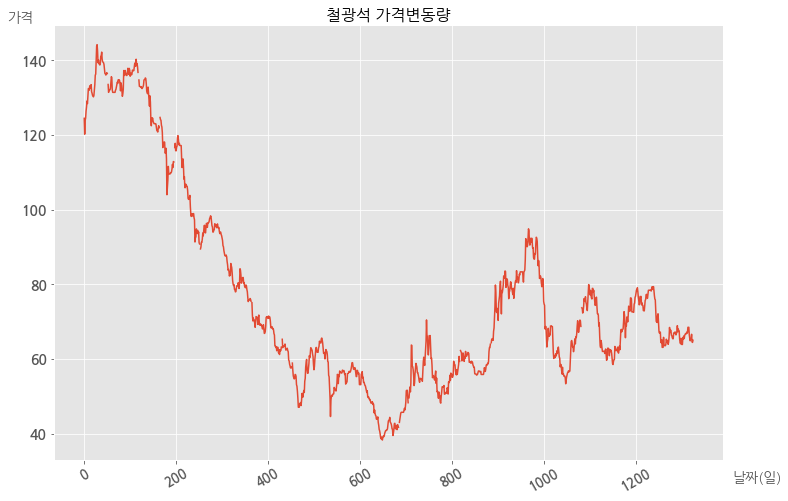

In [37]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

plt.xticks(rotation=30, fontsize = 13)
plt.yticks(fontsize = 14)
plt.xlabel('날짜(일)', fontsize=14)
plt.ylabel('가격', fontsize=14, rotation = 0) 
plt.title('철광석 가격변동량', fontsize = 16)

ax.xaxis.set_label_coords(1.05, -0.025)
ax.yaxis.set_label_coords(-0.05, 1.0)

ax.grid(True) # 얇은 선 격자
plt.plot(df['target'])
plt.show()

##### 보기 어렵다 연도별 월별 barplot 은 어떨까

In [18]:
df["year"] = df['date'].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df.shape

(1326, 59)

[Text(0.5,0,'day'), Text(0.5,1,'일별')]

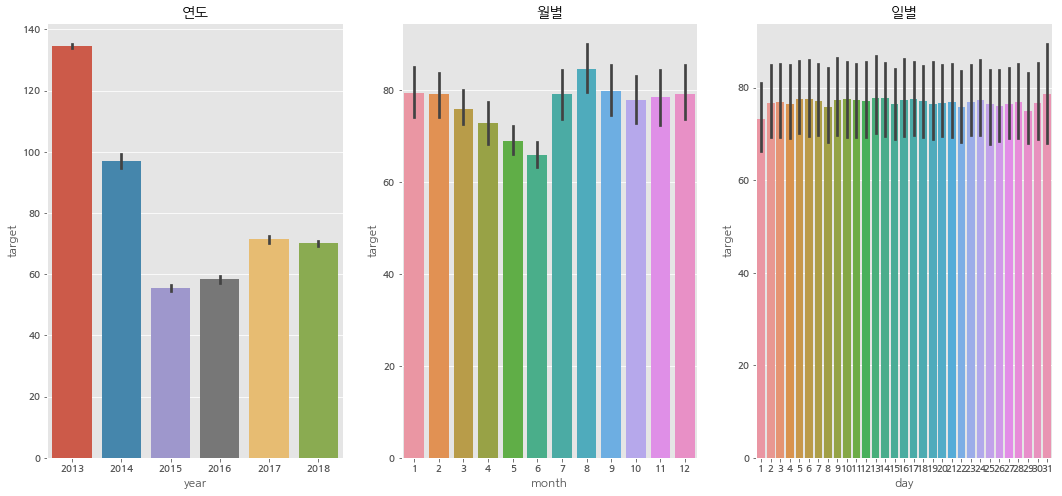

In [19]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="year", y="target", ax=ax1)
sns.barplot(data=df, x="month", y="target", ax=ax2)
sns.barplot(data=df, x="day", y="target", ax=ax3)

ax1.set(ylabel='target',title="연도")
ax2.set(xlabel='month',title="월별")
ax3.set(xlabel='day', title="일별")

#### 연도별로 2013년이가격이 제일 높았고 17~18년 이 비슷하다 월별 추이를 봤을떄 7~9월 특히 8월 즉 여름시즌이 철광석 가격이 높은걸 알수 있다 6월은 뭔데 가격이 젤 낮을까?? 

In [ ]:
# 산점도 행렬
### 이많은 변수를 어떻게 다봐 시간 엄청걸린다 
sns.set(style='whitegrid', context= 'notebook')
cols= df.columns[1:]
sns.pairplot(df[cols],size =2)
plt.show()

KeyboardInterrupt: 

#### 산점도 행렬은 무리가 있으니 상관관계를 구하고 시각화해보자

In [39]:
corr_df=df.corr()
corr_df

,target,Bloomberg(DJ-UBS) Commodity Index1991=100,Bloomberg Commodity Total Return1991=100,TR/CC CRB Index1967=100,S&P GSCI1970=100,GSCI Energy1970=100,GSCI Petroleum1970=100,GSCI Non-Energy1970=100,GSCI Reduced Energy Index (CPW 2)1970=100,GSCI Light Energy Index (CPW 4)1970=100,...,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000,철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.3,USD/KRW (미국 달러 / 한국 원),CNY/KRW (중국 인민폐 / 한국 원),USD/CNY (미국 달러 / 중국 인민폐),year,month,day
target,1.000000,0.803179,0.806498,0.786243,0.867018,0.868512,0.869136,0.790334,0.863242,0.855436,...,0.448523,0.171741,0.123899,1.000000,-0.536973,-0.098673,-0.462746,-0.586271,0.047180,0.000881
Bloomberg(DJ-UBS) Commodity Index1991=100,0.803179,1.000000,0.999716,0.997199,0.953807,0.946171,0.944691,0.936329,0.957263,0.959591,...,0.851346,0.624066,0.574513,0.802972,-0.720837,-0.020180,-0.750750,-0.804318,0.055774,0.002109
Bloomberg Commodity Total Return1991=100,0.806498,0.999716,1.000000,0.997270,0.959520,0.951968,0.950566,0.942429,0.962985,0.965379,...,0.846826,0.611154,0.560864,0.806281,-0.731143,-0.031871,-0.750569,-0.791755,0.053105,0.002496
TR/CC CRB Index1967=100,0.786243,0.997199,0.997270,1.000000,0.956479,0.950214,0.948794,0.930874,0.958994,0.959987,...,0.857978,0.629017,0.581848,0.786065,-0.730778,-0.029013,-0.755171,-0.797453,0.072890,0.002656
S&P GSCI1970=100,0.867018,0.953807,0.959520,0.956479,1.000000,0.998489,0.998623,0.949151,0.999386,0.996287,...,0.713131,0.402494,0.350456,0.866825,-0.776270,-0.152833,-0.681718,-0.644989,0.057431,0.009104
GSCI Energy1970=100,0.868512,0.946171,0.951968,0.950214,0.998489,1.000000,0.999310,0.934080,0.996346,0.991026,...,0.699977,0.391023,0.340638,0.868323,-0.770681,-0.153227,-0.675506,-0.641606,0.071698,0.012945
GSCI Petroleum1970=100,0.869136,0.944691,0.950566,0.948794,0.998623,0.999310,1.000000,0.932932,0.996327,0.990793,...,0.699099,0.391033,0.341569,0.868952,-0.770868,-0.146990,-0.681689,-0.640897,0.068309,0.011130
GSCI Non-Energy1970=100,0.790334,0.936329,0.942429,0.930874,0.949151,0.934080,0.932932,1.000000,0.959530,0.972659,...,0.741292,0.425098,0.365085,0.789979,-0.782405,-0.167946,-0.672466,-0.589722,-0.044635,-0.007403
GSCI Reduced Energy Index (CPW 2)1970=100,0.863242,0.957263,0.962985,0.958994,0.999386,0.996346,0.996327,0.959530,1.000000,0.998684,...,0.720683,0.408467,0.355300,0.863041,-0.780167,-0.154173,-0.684465,-0.643932,0.046825,0.007177
GSCI Light Energy Index (CPW 4)1970=100,0.855436,0.959591,0.965379,0.959987,0.996287,0.991026,0.990793,0.972659,0.998684,1.000000,...,0.729267,0.414768,0.360040,0.855218,-0.784797,-0.156904,-0.686581,-0.639084,0.030875,0.004550


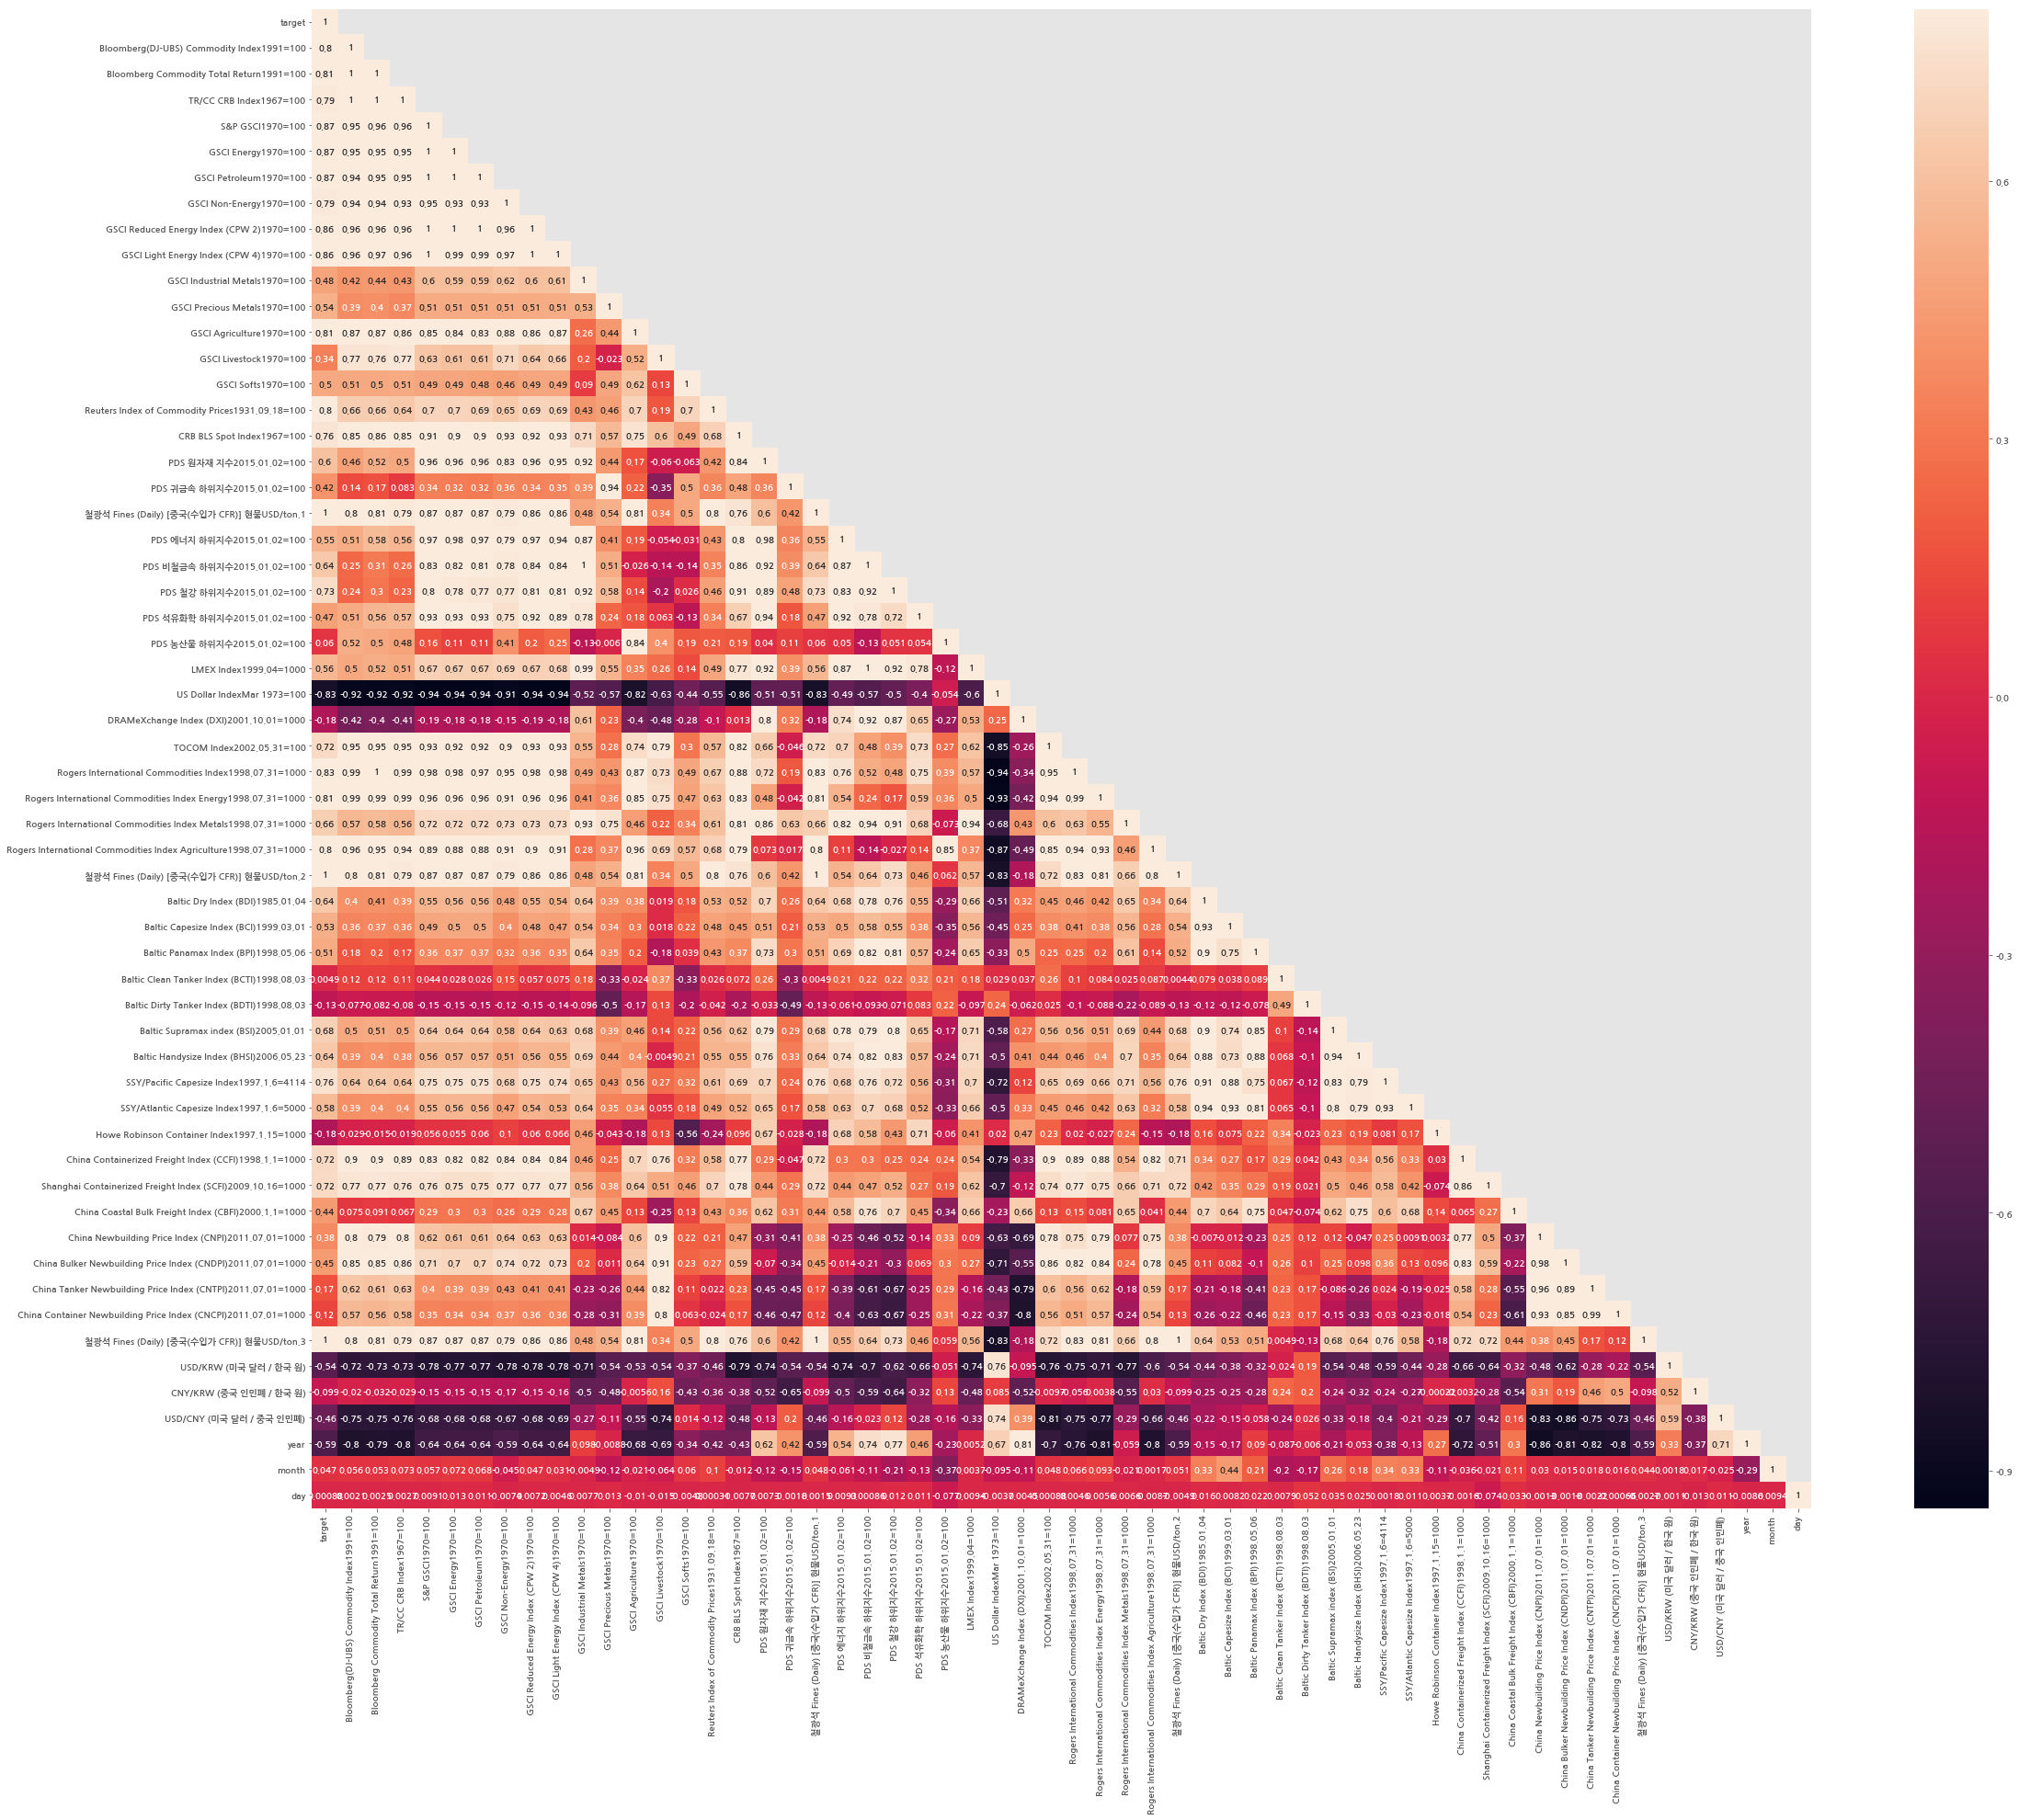

In [47]:
mask = np.array(corr_df)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(40,30)
sns.heatmap(corr_df, mask=mask,vmax=.8, square=True,annot=True)

#### 참보기 어렵다 그냥 일단 target과 다른 변수들의 상관관계나 봐보자 

In [57]:
corr_df['target']

target                                                               1.000000
Bloomberg(DJ-UBS) Commodity Index1991=100                            0.803179
Bloomberg Commodity Total Return1991=100                             0.806498
TR/CC CRB Index1967=100                                              0.786243
S&P GSCI1970=100                                                     0.867018
GSCI Energy1970=100                                                  0.868512
GSCI Petroleum1970=100                                               0.869136
GSCI Non-Energy1970=100                                              0.790334
GSCI Reduced Energy Index (CPW 2)1970=100                            0.863242
GSCI Light Energy Index (CPW 4)1970=100                              0.855436
GSCI Industrial Metals1970=100                                       0.483786
GSCI Precious Metals1970=100                                         0.535497
GSCI Agriculture1970=100                                        

In [66]:
## 상관관계가 +- 0.8 이상인것들
corr_df[-0.8 > corr_df.target]['target']

US Dollar IndexMar 1973=100   -0.828199
Name: target, dtype: float64

In [67]:
corr_df[0.8< corr_df.target]['target']

target                                                               1.000000
Bloomberg(DJ-UBS) Commodity Index1991=100                            0.803179
Bloomberg Commodity Total Return1991=100                             0.806498
S&P GSCI1970=100                                                     0.867018
GSCI Energy1970=100                                                  0.868512
GSCI Petroleum1970=100                                               0.869136
GSCI Reduced Energy Index (CPW 2)1970=100                            0.863242
GSCI Light Energy Index (CPW 4)1970=100                              0.855436
GSCI Agriculture1970=100                                             0.807769
Reuters Index of Commodity Prices1931.09.18=100                      0.803909
철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton.1                          1.000000
Rogers International Commodities Index1998.07.31=1000                0.831952
Rogers International Commodities Index Energy1998.07.31=1000    

In [42]:
ship_index=price_ship[['날짜','Baltic Dry Index (BDI)1985.01.04',
       'Baltic Capesize Index (BCI)1999.03.01',
       'Baltic Panamax Index (BPI)1998.05.06',
       'Baltic Clean Tanker Index (BCTI)1998.08.03',
       'Baltic Dirty Tanker Index (BDTI)1998.08.03',
       'Baltic Supramax index (BSI)2005.01.01',
       'Baltic Handysize Index (BHSI)2006.05.23',
       'SSY/Pacific Capesize Index1997.1.6=4114',
       'SSY/Atlantic Capesize Index1997.1.6=5000',
       'Howe Robinson Container Index1997.1.15=1000',
       'China Containerized Freight Index (CCFI)1998.1.1=1000',
       'Shanghai Containerized Freight Index (SCFI)2009.10.16=1000',
       'China Coastal Bulk Freight Index (CBFI)2000.1.1=1000',
       'China Newbuilding Price Index (CNPI)2011.07.01=1000',
       'China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000',
       'China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000',
       'China Container Newbuilding Price Index (CNCPI)2011.07.01=1000']]


In [9]:
price_ship.describe()

,날짜,target,Baltic Dry Index (BDI)1985.01.04,Baltic Capesize Index (BCI)1999.03.01,Baltic Panamax Index (BPI)1998.05.06,Baltic Clean Tanker Index (BCTI)1998.08.03,Baltic Dirty Tanker Index (BDTI)1998.08.03,Baltic Supramax index (BSI)2005.01.01,Baltic Handysize Index (BHSI)2006.05.23,SSY/Pacific Capesize Index1997.1.6=4114,SSY/Atlantic Capesize Index1997.1.6=5000,Howe Robinson Container Index1997.1.15=1000,China Containerized Freight Index (CCFI)1998.1.1=1000,Shanghai Containerized Freight Index (SCFI)2009.10.16=1000,China Coastal Bulk Freight Index (CBFI)2000.1.1=1000,China Newbuilding Price Index (CNPI)2011.07.01=1000,China Bulker Newbuilding Price Index (CNDPI)2011.07.01=1000,China Tanker Newbuilding Price Index (CNTPI)2011.07.01=1000,China Container Newbuilding Price Index (CNCPI)2011.07.01=1000
count,1.320000e+03,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1318.000000,1318.000000,1316.000000,1319.000000,1319.000000,1265.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,2.015561e+07,76.918142,1009.057576,1680.630303,996.409848,580.531818,755.837121,824.359091,476.965909,4343.710167,5927.469651,551.108435,887.450061,837.640591,1005.700941,851.576542,851.902513,917.554455,850.731912
std,1.490460e+04,26.689976,390.200020,940.334010,391.089452,94.314464,123.448767,234.788818,131.870567,1684.628664,2004.249353,109.278459,153.349325,197.324589,165.859376,71.419976,75.899683,68.772592,43.670499
min,2.013070e+07,38.300000,290.000000,161.000000,282.000000,346.000000,416.000000,243.000000,183.000000,1594.000000,2419.000000,392.000000,632.360000,400.430000,771.010000,759.000000,747.000000,818.000000,782.000000
25%,2.014093e+07,57.910000,720.000000,954.000000,678.000000,522.000000,655.000000,665.000000,377.000000,2941.000000,4203.750000,467.000000,772.270000,705.190000,867.490000,780.000000,783.000000,844.000000,806.000000
50%,2.015123e+07,67.670000,966.000000,1575.000000,940.000000,564.500000,747.000000,849.000000,475.000000,4076.000000,5792.000000,535.050000,837.740000,824.180000,969.660000,851.000000,832.000000,930.000000,861.000000
75%,2.017033e+07,87.722500,1215.000000,2265.750000,1290.750000,628.000000,835.500000,954.500000,581.000000,5379.000000,7238.000000,607.600000,1059.980000,1009.170000,1140.270000,923.000000,929.000000,991.000000,895.000000
max,2.018070e+07,144.180000,2337.000000,4329.000000,2096.000000,867.000000,1344.000000,1562.000000,821.000000,9548.000000,11593.000000,846.000000,1170.590000,1195.360000,1597.830000,960.000000,981.000000,1003.000000,906.000000


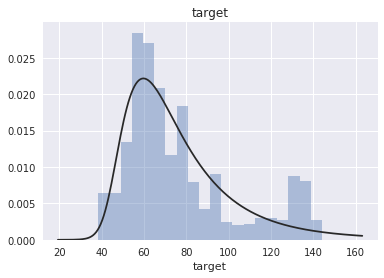

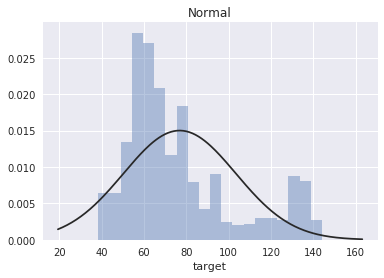

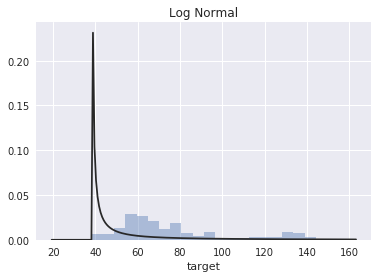

In [51]:
import scipy.stats as st
y = price_exchange['target']
plt.figure(1); plt.title('target')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

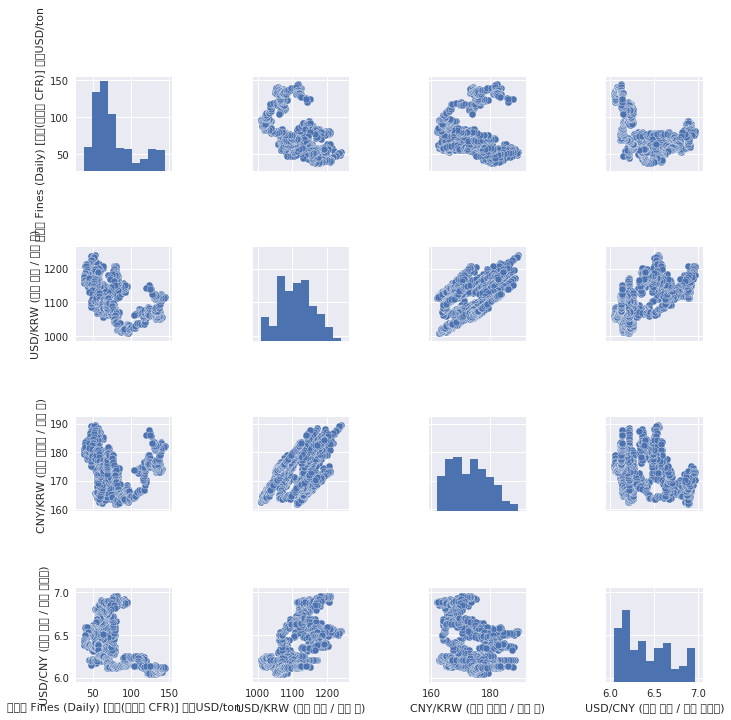

In [46]:
sns.set()
cols = ['철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton',
       'USD/KRW (미국 달러 / 한국 원)', 'CNY/KRW (중국 인민폐 / 한국 원)',
       'USD/CNY (미국 달러 / 중국 인민폐)']
sns.pairplot(price_exchange[cols], size = 2.5)
plt.show();

In [24]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(train, features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 5 columns):
날짜                                           1302 non-null int64
철광석 Fines (Daily) [중국(수입가 CFR)] 현물USD/ton    1302 non-null float64
USD/KRW (미국 달러 / 한국 원)                       1302 non-null float64
CNY/KRW (중국 인민폐 / 한국 원)                      1302 non-null float64
USD/CNY (미국 달러 / 중국 인민폐)                     1302 non-null float64
dtypes: float64(4), int64(1)
memory usage: 50.9 KB


In [6]:
# NA 값이 너무많으므로 일단 다 제거해보자
price=price.dropna(how='any')
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 20 columns):
날짜                                          256 non-null int64
철광석 Fines (Daily) [중국(수입가 CFR)] 현물          256 non-null float64
날짜.1                                        256 non-null float64
철광석 62% [DCE] 2018.09                       256 non-null float64
날짜.2                                        256 non-null float64
고철 HMS No.1 [미 동부 Composite가격] 현물           256 non-null float64
날짜.3                                        256 non-null float64
철근 [SHFE] 2018.10                           256 non-null float64
날짜.4                                        256 non-null float64
철근 고장력 HD10mm [국내(1차 유통가)] 현물               256 non-null float64
날짜.5                                        256 non-null float64
냉연코일 1.0x4x8mm [국내(1차 유통가)] 현물              256 non-null float64
날짜.6                                        256 non-null float64
열연코일 4.5x4x8 ~ 5.9x4x8mm [국내(1차 유통가)] 현물    256 non-

In [41]:
target=price[['날짜','철광석 Fines (Daily) [중국(수입가 CFR)] 현물']]
volume=pd.read_csv('중국철광석생산량.csv',encoding='euc-kr')

In [42]:
volume=volume[5:]

,품목비교 Historical Data
날짜,중국 철광석 생산량
20180401,6746.8
20180301,6688.5
20180201,12346.4
20171201,10922.4
20171101,10965.8
20171001,12007.4
20170901,11912.6
20170801,11549.1
20170701,11466.4
